<a href="https://colab.research.google.com/github/ikarosgn/DMDP65/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np

#นำข้อมูลเข้าเพื่อนำข้อมูลมาเทรนแล้วสร้างโมเดล

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/DPDM65/train.csv')

In [204]:
data_train 

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.000000,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,1.0,1.0,658.507853,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,3.0,3.0,208.000000,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.000000,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,2.0,114.000000,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,5.0,5.0,0.000000,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,1.0,1.0,4625.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.000000,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.000000,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


#เช็คชนิดตัวแปรเชิงคุณภาพและเชิงปริมาณ

In [5]:
data_train.dtypes

Unnamed: 0              int64
id                     object
project_name           object
company                object
province               object
district               object
sub_district           object
property_type          object
home improvement       object
renovate               object
public utility         object
land type              object
land wide(m)          float64
land long(m)           object
topsoil                object
corner                 object
zip_code              float64
zone                   object
alley                  object
street                 object
latitude               object
longitude              object
number_of_rai         float64
number_of_ngan         object
number_of_va          float64
construct_year        float64
model                 float64
sell_price             object
number_of_unit         object
number_of_story        object
number_of_bedroom      object
number_of_bathroom     object
number_of_parking      object
usable_are

In [155]:
data_train['number_of_unit']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2720    NaN
2721    NaN
2722    NaN
2723    NaN
2724    NaN
Name: number_of_unit, Length: 2725, dtype: object

#แก้ไขerrorในข้อมูลเชิงปริมาณที่เป็นตัวเลข
พบว่ามีตัวแปร 
zip_code number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
construct_year        float64
model                 float64
sell_price            float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
number_of_parking     float64
usable_area           float64
เป็นตัวแปรเชิงปริมาณที่เหลือเป็นเชิงคุณภาพ
แต่ **zipcode** เป็นรหัสไปรษณีจึงจะไม่ใช้ในการนำมาสร้างตัวแบบและ **number_of_unit** มี missing อยู่มากจึงตัดตัวแปรนี้ออก





In [205]:
data_train['usable_area'] = pd.to_numeric(data_train['usable_area'],errors='coerce')
data_train['number_of_rai'] = pd.to_numeric(data_train['number_of_rai'],errors='coerce')
data_train['number_of_ngan'] = pd.to_numeric(data_train['number_of_ngan'],errors='coerce')
data_train['number_of_va'] = pd.to_numeric(data_train['number_of_va'],errors='coerce')
data_train['number_of_story'] = pd.to_numeric(data_train['number_of_story'],errors='coerce')
data_train['number_of_bedroom'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['number_of_bathroom'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['number_of_parking'] = pd.to_numeric(data_train['number_of_bedroom'],errors='coerce')
data_train['sell_price'] = pd.to_numeric(data_train['sell_price'],errors='coerce')

เช็ค missing ตัวแปรตามว่ามีหรือไม่

In [206]:
set(data_train['sell_price'].isnull())

{False}

สรุปว่ามีจึงจะแทนค่า missing เป็นค่าเฉลี่ย

In [207]:
data_train['sell_price'] = data_train['sell_price'].replace(np.NaN, data_train['sell_price'].mean())


เช็คว่าเหลือ missing ไหม สรุปว่าไม่มี missing แล้ว

In [208]:
set(data_train['sell_price'].isnull())


{False}

เช็คว่าตัวแปรต้นมี missing ไหมโดยจากการศึกษา สรุปว่ามี number_of_rai number_of_va ที่ไม่มี missing ตัวตัวแปรอื่นมีดังนั้นจะแทนค่า missing 

In [209]:
print(set(data_train['usable_area'].isnull()))
print(set(data_train['number_of_rai'].isnull()))
print(set(data_train['number_of_ngan'].isnull()))
print(set(data_train['number_of_va'].isnull()))
print(set(data_train['number_of_story'].isnull()))
print(set(data_train['number_of_bedroom'].isnull()))
print(set(data_train['number_of_bathroom'].isnull()))
print(set(data_train['number_of_parking'].isnull()))

{False}
{False}
{False}
{False}
{False}
{False}
{False}
{False}


จากการสำรวจข้อมูลพบว่าตัวแปร number_of_rai number_of_ngan number_of_va เป็นตัวแปรเชิงปริมาณแบบต่อเนื่อง จะแทน missing เป็นค่าเฉลี่ย 

In [210]:
data_train['number_of_rai'] = data_train['number_of_rai'].replace(np.NaN, data_train['number_of_rai'].mean())
data_train['number_of_ngan'] = data_train['number_of_ngan'].replace(np.NaN, data_train['number_of_ngan'].mean())
data_train['number_of_va'] = data_train['number_of_va'].replace(np.NaN, data_train['number_of_va'].mean())
print(set(data_train['number_of_rai'].isnull()))
print(set(data_train['number_of_ngan'].isnull()))
print(set(data_train['number_of_va'].isnull()))

{False}
{False}
{False}


นำตัวแปร  number_of_rai number_of_ngan number_of_va มาสร้างตัวแปรใหม่ (area)เนื่องจากเป็นตัวแปรเชิงพื้นที่เหมือนกันดังนี้ **1 ไร่ = 4 งาน = 400 ตารางวา = 1,600 ตารางเมตร 1 งาน = 100 ตารางวา** 

In [211]:
area = data_train['number_of_rai']+(data_train['number_of_ngan']/4)+(data_train['number_of_va']/400)
area

0        0.2460
1        3.1800
2        0.1300
3        0.1000
4        0.1250
         ...   
2720     0.3375
2721    11.5625
2722     0.1450
2723     0.1950
2724     0.0800
Length: 2725, dtype: float64

In [212]:
set(area.isnull())


{False}

แทนค่าเฉลี่ยใน missing ของตัวแปร usable_area เช่นกันเพราะเป็นข้อมูลเชิงปริมาณที่ต่อเนื่อง

In [213]:

set(data_train['usable_area'].isnull())

{False}

จากการสำรวจข้อมูลพบว่า number_of_story number_of_bedroom number_of_bathroom number_of_parking เป็นข้อมูลประเภทไม่ต่อเนื่อง ดังนั้นจะแทนค่า missing เป็นค่า มัธยฐานแทน

In [214]:
data_train['number_of_story'] = data_train['number_of_story'].replace(np.NaN, data_train['number_of_story'].median())
data_train['number_of_bedroom'] = data_train['number_of_bedroom'].replace(np.NaN, data_train['number_of_bedroom'].median())
data_train['number_of_bathroom'] = data_train['number_of_bathroom'].replace(np.NaN, data_train['number_of_bathroom'].median())
data_train['number_of_parking'] = data_train['number_of_parking'].replace(np.NaN, data_train['number_of_parking'].median())

In [215]:
data_train['number_of_story'].median()

2.0

In [216]:
data_train

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.000000,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,1.0,1.0,658.507853,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,3.0,3.0,208.000000,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.000000,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,2.0,114.000000,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,5.0,5.0,0.000000,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,1.0,1.0,4625.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.000000,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.000000,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


In [217]:
data_train_1 = pd.concat([data_train, pd.Series(area,name='area')],axis='columns')
data_train_1

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage,area
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.000000,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,0.2460
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,1.0,658.507853,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,3.1800
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,3.0,208.000000,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN,0.1300
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,145.000000,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN,0.1000
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,114.000000,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN,0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,5.0,0.000000,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN,0.3375
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,1.0,4625.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5625
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.000000,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN,0.1450
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.000000,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN,0.1950


In [218]:
set(data_train_1['district'])

{'กระนวน',
 'ชนบท',
 'ชุมแพ',
 'ชุุมแพ',
 'ซำสูง',
 'ท่าพระ',
 'น้ำพอง',
 'บ้านทุ่ม',
 'บ้านฝาง',
 'บ้านแฮด',
 'บ้านไผ่',
 'พระยืน',
 'พล',
 'ภูผาม่าน',
 'ภูเวียง',
 'มัญจาคีรี',
 'สีชมพู',
 'หนองนาคำ',
 'หนองสองห้อง',
 'หนองเรือ',
 'หนอนนาคำ',
 'อุบลรัตน์',
 'เขาสวนกวาง',
 'เปือยน้อย',
 'เมืองขอนแก่น',
 'เมืองพล',
 'เวียงเก่า',
 'แวงน้อย',
 'แวงใหญ่',
 'โคกโพธิ์ไชย',
 'โนนศิลา',
 'ในเมือง',
 'ไม่ระบุ'}

In [219]:
data_dist = data_train_1['district']

In [220]:
data_dist[data_dist!='เมืองขอนแก่น'] = 'ต่างอำเภอ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
set(data_dist)

{'ต่างอำเภอ', 'เมืองขอนแก่น'}

In [222]:
data_train_1['district'] = data_dist

In [223]:
data_train_1['district']

0       เมืองขอนแก่น
1       เมืองขอนแก่น
2       เมืองขอนแก่น
3       เมืองขอนแก่น
4       เมืองขอนแก่น
            ...     
2720    เมืองขอนแก่น
2721       ต่างอำเภอ
2722    เมืองขอนแก่น
2723    เมืองขอนแก่น
2724       ต่างอำเภอ
Name: district, Length: 2725, dtype: object

In [224]:
data_train['district'] = data_train['district'].replace(np.NaN, 'ไม่ระบุ')

In [225]:
data_train_11 = data_train_1[['usable_area','area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','sell_price','number_of_rai','number_of_ngan','number_of_va','district','property_type','furniture']]

In [226]:
data_train_11

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,district,property_type,furniture
0,0.000000,0.2460,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ
1,658.507853,3.1800,2.0,1.0,1.0,1.0,17490000.0,3.0,0.0,72.0,เมืองขอนแก่น,ที่ดิน,ไม่ระบุ
2,208.000000,0.1300,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,เมืองขอนแก่น,บ้านเดี่ยว,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ..."
3,145.000000,0.1000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่มี
4,114.000000,0.1250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.000000,0.3375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,เมืองขอนแก่น,บ้านเดี่ยว,ตกแต่งครบ
2721,4625.000000,11.5625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,ต่างอำเภอ,ที่ดิน,NaN
2722,0.000000,0.1450,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ
2723,0.000000,0.1950,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,เมืองขอนแก่น,บ้านเดี่ยว,ไม่ระบุ


In [227]:
data_fur = data_train_11['furniture']

In [228]:
data_fur = data_fur.fillna('ไม่ทราบ')

In [229]:
data_fur[(data_fur=='ไม่มี') | (data_fur=='ไม่มีเฟอร์นิเจอร์') | (data_fur=='ไม่มีเฟอร์นิเจอร์. เฟอร์นิเจอร์นำเข้าสามารถเจรจาแยกกันโดยผู้ซื้อ') | (data_fur=='ไม่รวมตู้เย็น,ทีวี,เครื่องซักผ้า') | (data_fur=='ไม่รวมเฟอร์นิเจอร์')] = 'ไม่มีเฟอร์นิเจอร์'

In [230]:
data_fur[(data_fur!='ไม่ระบุ') & (data_fur!='ไม่มีเฟอร์นิเจอร์')] = 'มีเฟอร์นิเจอร์'

In [231]:
set(data_fur)

{'มีเฟอร์นิเจอร์', 'ไม่มีเฟอร์นิเจอร์', 'ไม่ระบุ'}

In [232]:
set(data_fur.isnull())

{False}

In [233]:
data_train_1['furniture'] =data_fur

In [234]:
data_train_11 = data_train_1[['usable_area','area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','sell_price','number_of_rai','number_of_ngan','number_of_va','district','property_type','furniture']]

In [235]:
data_train_11.isnull().any()

usable_area           False
area                  False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
number_of_parking     False
sell_price            False
number_of_rai         False
number_of_ngan        False
number_of_va          False
district              False
property_type         False
furniture             False
dtype: bool

In [236]:
data_train_dum = pd.get_dummies(data_train_11)
data_train_dum 

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
0,0.000000,0.2460,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,...,1,0,0,0,1,0,0,0,0,1
1,658.507853,3.1800,2.0,1.0,1.0,1.0,17490000.0,3.0,0.0,72.0,...,1,0,0,1,0,0,0,0,0,1
2,208.000000,0.1300,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,...,1,0,0,0,1,0,0,1,0,0
3,145.000000,0.1000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,...,1,0,0,0,1,0,0,0,1,0
4,114.000000,0.1250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.000000,0.3375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,...,1,0,0,0,1,0,0,1,0,0
2721,4625.000000,11.5625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,...,0,0,0,1,0,0,0,1,0,0
2722,0.000000,0.1450,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,...,1,0,0,0,1,0,0,0,0,1
2723,0.000000,0.1950,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,...,1,0,0,0,1,0,0,0,0,1


In [237]:
data_train_dum = data_train_dum.dropna()
data_train_dum

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
0,0.000000,0.2460,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,...,1,0,0,0,1,0,0,0,0,1
1,658.507853,3.1800,2.0,1.0,1.0,1.0,17490000.0,3.0,0.0,72.0,...,1,0,0,1,0,0,0,0,0,1
2,208.000000,0.1300,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,...,1,0,0,0,1,0,0,1,0,0
3,145.000000,0.1000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,...,1,0,0,0,1,0,0,0,1,0
4,114.000000,0.1250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.000000,0.3375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,...,1,0,0,0,1,0,0,1,0,0
2721,4625.000000,11.5625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,...,0,0,0,1,0,0,0,1,0,0
2722,0.000000,0.1450,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,...,1,0,0,0,1,0,0,0,0,1
2723,0.000000,0.1950,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,...,1,0,0,0,1,0,0,0,0,1


In [238]:
data_train_dum.corr()

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
usable_area,1.000000,0.344515,0.004720,-0.003870,-0.003870,-0.003870,0.003775,0.285312,0.965338,0.038345,...,-0.016265,-0.017144,-0.023371,0.106722,-0.068056,-0.004491,-0.021295,0.068511,-0.009660,-0.065496
area,0.344515,1.000000,0.008526,-0.040656,-0.040656,-0.040656,0.061802,0.997851,0.342337,-0.007032,...,-0.107766,-0.060907,-0.064573,0.299512,-0.182220,-0.010907,-0.065703,0.129755,-0.030775,-0.120691
number_of_story,0.004720,0.008526,1.000000,0.006733,0.006733,0.006733,0.002061,0.008762,0.002409,-0.023748,...,0.040974,0.151639,0.003056,0.035317,-0.157897,-0.008204,0.089407,0.060557,-0.026050,-0.053186
number_of_bedroom,-0.003870,-0.040656,0.006733,1.000000,1.000000,1.000000,-0.004592,-0.040233,-0.026390,0.056289,...,0.184282,-0.011576,0.002884,-0.153634,0.152273,0.038751,-0.013156,0.316152,0.100099,-0.341117
number_of_bathroom,-0.003870,-0.040656,0.006733,1.000000,1.000000,1.000000,-0.004592,-0.040233,-0.026390,0.056289,...,0.184282,-0.011576,0.002884,-0.153634,0.152273,0.038751,-0.013156,0.316152,0.100099,-0.341117
number_of_parking,-0.003870,-0.040656,0.006733,1.000000,1.000000,1.000000,-0.004592,-0.040233,-0.026390,0.056289,...,0.184282,-0.011576,0.002884,-0.153634,0.152273,0.038751,-0.013156,0.316152,0.100099,-0.341117
sell_price,0.003775,0.061802,0.002061,-0.004592,-0.004592,-0.004592,1.000000,0.062911,0.000797,0.016242,...,-0.025350,-0.008634,-0.009897,0.045258,-0.028382,-0.002267,-0.008624,-0.003375,-0.004403,0.004538
number_of_rai,0.285312,0.997851,0.008762,-0.040233,-0.040233,-0.040233,0.062911,1.000000,0.280653,-0.019508,...,-0.105478,-0.057665,-0.062111,0.295743,-0.182608,-0.010362,-0.063914,0.129448,-0.030301,-0.120514
number_of_ngan,0.965338,0.342337,0.002409,-0.026390,-0.026390,-0.026390,0.000797,0.280653,1.000000,0.044645,...,-0.053421,-0.040610,-0.044572,0.155666,-0.079217,-0.010650,-0.042310,0.053181,-0.017869,-0.048054
number_of_va,0.038345,-0.007032,-0.023748,0.056289,0.056289,0.056289,0.016242,-0.019508,0.044645,1.000000,...,-0.098929,-0.189101,-0.084109,-0.057754,0.209979,-0.005054,-0.030744,-0.062702,0.010484,0.059501


In [239]:
data_train_dum.isnull().any()

usable_area                            False
area                                   False
number_of_story                        False
number_of_bedroom                      False
number_of_bathroom                     False
number_of_parking                      False
sell_price                             False
number_of_rai                          False
number_of_ngan                         False
number_of_va                           False
district_ต่างอำเภอ                     False
district_เมืองขอนแก่น                  False
property_type_คอนโด                    False
property_type_ทาวน์โฮม                 False
property_type_ที่ดิน                   False
property_type_บ้านเดี่ยว               False
property_type_บ้านแฝด                  False
property_type_อาคารพาณิชย์/สำนักงาน    False
furniture_มีเฟอร์นิเจอร์               False
furniture_ไม่มีเฟอร์นิเจอร์            False
furniture_ไม่ระบุ                      False
dtype: bool

In [58]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data_train_11)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5fc2474050> (for post_execute):


KeyboardInterrupt: ignored

In [240]:
q1 = np.quantile(data_train_dum['sell_price'], 0.25)
q3 = np.quantile(data_train_dum['sell_price'], 0.75)
iqr = q3-q1
upper_bound = q3+(3*iqr)
lower_bound = q1-(3*iqr)
data_train_detectO = data_train_dum[(data_train_11['sell_price'] >= lower_bound) & (data_train_dum['sell_price'] <= upper_bound)]

In [241]:
data_train_detectO
data_train_detectO.corr()

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
usable_area,1.000000,0.166978,0.011336,0.000317,0.000317,0.000317,0.085757,0.150787,0.492400,-0.052287,...,-0.039615,-0.033052,-0.058577,0.280688,-0.168016,-0.008702,-0.056938,0.110289,-0.020987,-0.103259
area,0.166978,1.000000,0.004328,-0.045207,-0.045207,-0.045207,0.162331,0.999184,0.206604,-0.007516,...,-0.187349,-0.063103,-0.062716,0.297897,-0.162046,-0.004646,-0.064746,0.060413,-0.030124,-0.051267
number_of_story,0.011336,0.004328,1.000000,-0.003823,-0.003823,-0.003823,0.052743,0.005349,-0.001745,-0.052497,...,0.041559,0.153930,0.005624,0.033588,-0.158900,-0.007657,0.086533,0.056523,-0.027432,-0.048180
number_of_bedroom,0.000317,-0.045207,-0.003823,1.000000,1.000000,1.000000,0.234337,-0.041576,-0.103377,-0.006003,...,0.244626,-0.037198,0.015160,-0.182495,0.178835,0.056867,-0.023499,0.419787,0.147820,-0.457752
number_of_bathroom,0.000317,-0.045207,-0.003823,1.000000,1.000000,1.000000,0.234337,-0.041576,-0.103377,-0.006003,...,0.244626,-0.037198,0.015160,-0.182495,0.178835,0.056867,-0.023499,0.419787,0.147820,-0.457752
number_of_parking,0.000317,-0.045207,-0.003823,1.000000,1.000000,1.000000,0.234337,-0.041576,-0.103377,-0.006003,...,0.244626,-0.037198,0.015160,-0.182495,0.178835,0.056867,-0.023499,0.419787,0.147820,-0.457752
sell_price,0.085757,0.162331,0.052743,0.234337,0.234337,0.234337,1.000000,0.160012,0.091549,0.000900,...,0.186311,-0.089916,-0.129169,0.075577,0.000337,-0.024665,0.094201,0.170532,-0.002558,-0.168159
number_of_rai,0.150787,0.999184,0.005349,-0.041576,-0.041576,-0.041576,0.160012,1.000000,0.170892,-0.025371,...,-0.177074,-0.054893,-0.056370,0.284947,-0.161771,-0.003383,-0.058697,0.062125,-0.028810,-0.053337
number_of_ngan,0.492400,0.206604,-0.001745,-0.103377,-0.103377,-0.103377,0.091549,0.170892,1.000000,0.003648,...,-0.242443,-0.121373,-0.133514,0.425960,-0.166740,-0.032295,-0.129814,0.004079,-0.047942,0.009587
number_of_va,-0.052287,-0.007516,-0.052497,-0.006003,-0.006003,-0.006003,0.000900,-0.025371,0.003648,1.000000,...,-0.144416,-0.234186,-0.103100,-0.046808,0.272443,-0.005545,-0.094854,-0.082569,0.014693,0.077596


In [61]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data_train_detectO)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5fc246d560> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5fc2474050> (for post_execute):


KeyboardInterrupt: ignored

In [242]:
set(data_train_detectO.isnull().any())

{False}

In [243]:
data_train_detectO

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,sell_price,number_of_rai,number_of_ngan,number_of_va,...,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
0,0.0,0.2460,2.0,0.0,0.0,0.0,2860000.0,0.0,0.0,98.4,...,1,0,0,0,1,0,0,0,0,1
2,208.0,0.1300,1.0,3.0,3.0,3.0,2800000.0,0.0,0.0,52.0,...,1,0,0,0,1,0,0,1,0,0
3,145.0,0.1000,2.0,3.0,3.0,3.0,2600000.0,0.0,0.0,40.0,...,1,0,0,0,1,0,0,0,1,0
4,114.0,0.1250,1.0,2.0,2.0,2.0,1490000.0,0.0,0.0,50.0,...,1,0,0,0,1,0,0,0,0,1
5,29.0,0.0000,2.0,1.0,1.0,1.0,1750000.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.3375,2.0,5.0,5.0,5.0,12500000.0,0.0,0.0,135.0,...,1,0,0,0,1,0,0,1,0,0
2721,4625.0,11.5625,2.0,1.0,1.0,1.0,8671875.0,11.0,2.0,25.0,...,0,0,0,1,0,0,0,1,0,0
2722,0.0,0.1450,2.0,0.0,0.0,0.0,1400000.0,0.0,0.0,58.0,...,1,0,0,0,1,0,0,0,0,1
2723,0.0,0.1950,2.0,0.0,0.0,0.0,2915000.0,0.0,0.0,78.0,...,1,0,0,0,1,0,0,0,0,1


In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [251]:
colName = [	'usable_area','area',	'number_of_story',	'number_of_bedroom',	'number_of_bathroom',	'number_of_parking',	'district_ต่างอำเภอ',	'district_เมืองขอนแก่น',	'property_type_คอนโด',	'property_type_ทาวน์โฮม',	'property_type_ที่ดิน',	'property_type_บ้านเดี่ยว','property_type_บ้านแฝด','property_type_อาคารพาณิชย์/สำนักงาน','furniture_มีเฟอร์นิเจอร์','furniture_ไม่มีเฟอร์นิเจอร์','furniture_ไม่ระบุ','sell_price']
data_train_detect1 = data_train_detectO[colName]
data_train_detect1.head()


,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ,sell_price
0,0.246,2.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,1,2860000.0
2,0.130,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0,2800000.0
3,0.100,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,0,1,0,2600000.0
4,0.125,1.0,2.0,2.0,2.0,0,1,0,0,0,1,0,0,0,0,1,1490000.0
5,0.000,2.0,1.0,1.0,1.0,0,1,1,0,0,0,0,0,1,0,0,1750000.0


In [254]:
data_X = data_train_detect1.drop('sell_price',axis=1) # Independet variable
#X = data_X.values
data_y = data_train_detect1['sell_price'] # dependent variable
#y = data_y.values

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.10, random_state=0)

In [255]:
print(X_train.shape)
X_train

(2196, 16)


,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
2703,0.3000,3.0,2.0,2.0,2.0,1,0,0,0,0,0,0,1,1,0,0
2594,0.1250,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0
2520,2.4575,2.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0
2094,1.0000,2.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,0,0,1
1680,0.4575,2.0,1.0,1.0,1.0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,3.0000,2.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,0,0,1
1943,3.2375,2.0,1.0,1.0,1.0,1,0,0,0,1,0,0,0,1,0,0
862,10.3200,2.0,1.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,1
940,0.2375,2.0,4.0,4.0,4.0,0,1,0,0,0,1,0,0,0,0,1


In [256]:
print(X_test.shape)
X_test

(245, 16)


,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,district_ต่างอำเภอ,district_เมืองขอนแก่น,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ
1260,0.53000,2.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,1
1487,0.15000,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,0,0,1
2693,0.15000,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0
617,0.17500,2.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,0,0
1343,0.15000,2.0,1.0,1.0,1.0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,0.19025,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,0,1,0
2343,0.00000,2.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0
2678,0.00000,2.0,2.0,2.0,2.0,0,1,1,0,0,0,0,0,0,0,1
812,0.04750,2.0,2.0,2.0,2.0,0,1,0,1,0,0,0,0,1,0,0


In [257]:
lm = LinearRegression()

In [258]:
model = lm.fit(X_train, y_train)
model

LinearRegression()

In [259]:
scores = cross_val_score(lm, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.13724945  0.14390085  0.18427055 -0.57762871  0.22072189  0.1459992
  0.16536693  0.18155796  0.15391452  0.10782754]


In [260]:
predictions = cross_val_predict(model, X_test, y_test, cv=10)  
print(len(predictions))
predictions

245


array([ 2193413.39348764,  3726982.5543711 ,  4097543.90733859,
        4107005.18977484,  3407932.82635338,  2235043.03620716,
        2669922.07943647,  2218361.52189058,  2726784.38687835,
        3192311.62750502,  1550970.44440717,  2748450.72365738,
        1688159.03973286,  1587238.5445722 ,  4083204.85817739,
        4088082.62490233,  1471911.63514303,  5038445.75940678,
        1518802.0841239 ,  2687898.51606535,  1536210.84380661,
        2480505.11111909,  3988215.18836801,  2730844.95275597,
        5156155.14216883,  1681569.08005311,  2838774.08339182,
        3681035.63131981,  2332756.34375389,  2318922.4257256 ,
        2703354.51991907,  2639390.74475907,  1916374.14495859,
        2296664.9504547 ,  2257680.15634836,  3237190.27254894,
        7164851.77541474,  3772020.98398472,  2583241.20487113,
        2506963.6520939 ,  2720129.07319983,  3789874.34375074,
        1519696.53262842,  4300492.1283343 ,  2686387.57430507,
        2121614.32949077,  2749421.09287

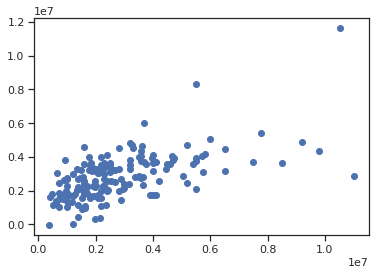

In [138]:
plt.scatter(y_test, predictions)

In [139]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1128994.4418939746
MSE: 2355577383805.305
RMSE: 1534789.035602387


In [140]:
import pickle

# Dump the trained decision tree classifier with Pickle
model_filename = '/content/drive/MyDrive/DPDM65/Linear-Regressor.pkl'
# Open the file to save as pkl file
model_pkl = open(model_filename, 'wb')
pickle.dump(model, model_pkl)
# Close the pickle instances
model_pkl.close()

In [141]:
# Loading the saved decision tree model pickle
Regressor = open(model_filename, 'rb')
Regressor_model = pickle.load(Regressor)
print("Loaded Decision tree model :: ", Regressor_model)

Loaded Decision tree model ::  LinearRegression()


In [142]:
# prediction from Load model
pred = Regressor_model.predict(X_test)
print(len(pred))
print(pred)

174
[2149324.99847369 4261131.67745849 1188647.19179143 1307488.49503714
 2731004.17716676 4428086.33194975 4855841.96494742 2854293.22232002
 3724026.36381284 4020207.62970297 3763987.40709459  108005.11194311
 3854283.4765766  1236535.6171123  3098371.12238149 3601925.51594063
 3775375.31870244 1509289.3110152  3132564.18846915 3351314.19292421
 2811939.81211257 5095876.57443726 4523885.88581522 2794474.48831568
 3183769.77815159  935900.97827475 4836405.82393705 3870525.6254332
 1488446.45722449 2148225.01767667 3280805.15988109 2724930.5182079
 2148762.78606633 3182889.79351398 1857900.95643517 2248219.3634045
 1728376.34288421 3763463.79283279 3858404.86253024 2650102.67502866
 3459056.21395034 5623987.02585856 3656270.36802941 3725932.99719434
 1606233.16461316 4027869.82116883 1509431.30143863 1855627.40493275
 1636683.39295056 1855578.51689732 4264408.16254603 4353218.50476296
 4179547.0866698  2801460.61783444 2211806.77895147 1713659.0450442
 2442835.10639879 4502777.40433685

In [143]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [-2.44440177e+01  5.17492315e+04  7.71812760e+04  9.79236419e+04
  9.79236419e+04  9.79236419e+04 -4.06921890e+04  3.69745144e+05
  2.05379240e+03 -7.85737249e+05  7.85737249e+05 -5.88113163e+05
 -6.33513501e+05  4.59018061e+05  4.03324054e+05 -1.03857184e+06
  1.39785639e+06  2.56340764e+05 -3.26621613e+05  7.02808488e+04]


In [144]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1102926.6494408716
MSE: 2427278009527.014
RMSE: 1557972.4033265205


In [122]:
X_test['sell_price'] = pred
X_test ##เป็นตาราง test ของอาจารย์

,usable_area,area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district_ต่างอำเภอ,...,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน,furniture_มีเฟอร์นิเจอร์,furniture_ไม่มีเฟอร์นิเจอร์,furniture_ไม่ระบุ,sell_price
2548,33.0,0.00000,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,1,0,0,2.136175e+06
2011,489.0,1.02000,1.0,11.0,11.0,11.0,1.0,0.0,8.0,1,...,0,0,0,1,0,0,0,0,1,4.292792e+06
1810,0.0,1.10000,2.0,0.0,0.0,0.0,1.0,0.0,40.0,1,...,0,0,0,1,0,0,0,0,1,1.201544e+06
252,0.0,0.24875,2.0,0.0,0.0,0.0,0.0,0.0,99.5,1,...,0,0,0,1,0,0,0,0,1,1.306107e+06
824,70.7,0.04500,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,...,0,0,0,1,0,0,1,0,0,2.696212e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,34.0,0.00000,8.0,1.0,1.0,1.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,1,0,0,2.623829e+06
1314,0.0,0.04250,2.0,0.0,0.0,0.0,0.0,0.0,17.0,1,...,0,0,0,1,0,0,0,0,1,1.135150e+06
111,37.0,0.00000,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,1,1.981618e+06
2424,34.0,0.00000,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,1,1.981662e+06


In [123]:
X_test['INDEX'] =  X_test.index+1

In [124]:
df_precict = X_test[['INDEX', 'sell_price']]
df_precict

,INDEX,sell_price
2548,2549,2.136175e+06
2011,2012,4.292792e+06
1810,1811,1.201544e+06
252,253,1.306107e+06
824,825,2.696212e+06
...,...,...
1046,1047,2.623829e+06
1314,1315,1.135150e+06
111,112,1.981618e+06
2424,2425,1.981662e+06


In [ ]:
df_precict.to_csv('/content/drive/MyDrive/DPDM65/predicted_y.csv')

#Final 13/11/2565

In [145]:
Finaldata = pd.read_csv('/content/drive/MyDrive/DPDM65/finaltest_X.csv')


In [147]:
Finaldata.head()

,INDEX,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,2925,21082.0,NaN,NaN,ขอนแก่น,บ้านไผ่,หินตั้ง,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,2926,30237P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,NaN,บ้านเดี่ยว,NaN,NaN,...,NaN,18-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2927,18099.0,NaN,NaN,ขอนแก่น,บ้านไผ่,ในเมือง,อาคารพาณิชย์/สำนักงาน,no,no,...,2.0,1.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
3,2928,1713.0,NaN,NaN,ขอนแก่น,อุบลรัตน์,บ้านดง,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
4,2929,3056P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,สำราญ,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN


In [151]:
Finaldata1 = Finaldata[['usable_area','number_of_story','number_of_bedroom','number_of_bathroom','number_of_parking','number_of_rai','number_of_ngan','number_of_va','district','property_type','furniture']]
Finaldata1

,usable_area,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,number_of_rai,number_of_ngan,number_of_va,district,property_type,furniture
0,NaN,NaN,NaN,NaN,NaN,13.0,1.0,0.0,บ้านไผ่,ที่ดิน,ไม่ระบุ
1,NaN,5.0,40.0,NaN,18-22,0.0,0.0,190.0,เมืองขอนแก่น,บ้านเดี่ยว,NaN
2,0.0,2.0,2.0,2.0,1.0,0.0,0.0,28.0,บ้านไผ่,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ
3,NaN,NaN,NaN,NaN,NaN,13.0,3.0,52.0,อุบลรัตน์,ที่ดิน,ไม่ระบุ
4,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,เมืองขอนแก่น,ที่ดิน,NaN
...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,4.0,0.0,0.0,0.0,0.0,0.0,81.0,เมืองขอนแก่น,อาคารพาณิชย์/สำนักงาน,ไม่ระบุ
796,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.0,เมืองขอนแก่น,บ้านเดี่ยว,NaN
797,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.5,เขาสวนกวาง,ที่ดิน,ไม่ระบุ
798,680.0,NaN,0.0,0.0,0.0,0.0,1.0,170.0,ชุมแพ,บ้านเดี่ยว,ไม่ระบุ


In [152]:
Finaldata1['number_of_rai'] = Finaldata1['number_of_rai'].replace(np.NaN, Finaldata1['number_of_rai'].mean())
Finaldata1['number_of_ngan'] = Finaldata1['number_of_ngan'].replace(np.NaN, Finaldata1['number_of_ngan'].mean())
Finaldata1['number_of_va'] = Finaldata1['number_of_va'].replace(np.NaN, Finaldata1['number_of_va'].mean())
print(set(Finaldata1['number_of_rai'].isnull()))
print(set(Finaldata1['number_of_ngan'].isnull()))
print(set(Finaldata1['number_of_va'].isnull()))

{False}
{False}
{False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [153]:
area = data_train['number_of_rai']+(data_train['number_of_ngan']/4)+(data_train['number_of_va']/400)
area

0        0.2460
1        3.1800
2        0.1300
3        0.1000
4        0.1250
         ...   
2720     0.3375
2721    11.5625
2722     0.1450
2723     0.1950
2724     0.0800
Length: 2725, dtype: float64